# Question 9 – Clustering 2D Points with K-means and Hierarchical Clustering
Data: 2D coordinates (x, y) of points measured in centimeters.
Here, we use the data in the question.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 2D coordinates from the exam (units: centimeters)
x_vals = [6.8, 0.8, 1.2, 2.8, 3.8, 4.4,
          4.8, 6.0, 6.2, 7.6, 7.8, 6.6,
          8.2, 8.4, 9.0, 9.6]

y_vals = [12.6, 9.8, 11.6, 9.6, 9.9, 6.5,
          1.1, 19.9, 18.5, 17.4, 12.2, 7.7,
          4.5, 6.9, 3.4, 11.1]

df = pd.DataFrame({'x_cm': x_vals, 'y_cm': y_vals})
df.head()


,x_cm,y_cm
0,6.8,12.6
1,0.8,9.8
2,1.2,11.6
3,2.8,9.6
4,3.8,9.9


## 9(a) Question – Are the Data Already Normalized?
> Are the x and y data already normalized? Why is normalization very important in clustering?

In [2]:
# 9(a) – Basic statistics

print(df.describe())

           x_cm       y_cm
count  16.00000  16.000000
mean    5.87500  10.168750
std     2.68713   5.293483
min     0.80000   1.100000
25%     4.25000   6.800000
50%     6.40000   9.850000
75%     7.90000  12.300000
max     9.60000  19.900000


### 9(a) Explanation – Normalization

Both x and y are in **centimeters**, with similar ranges. So they are roughly on the same scale.

Normalization is important in clustering because distance-based methods (k-means, hierarchical clustering) use
**Euclidean distance**:
$$ d(x,y) = \sqrt{\sum_j (x_j - y_j)^2}. $$
If one feature has a much larger scale than others, it dominates the distance and hence the clustering. Therefore,
when features have different units or scales, we should normalize (e.g., standardize to mean 0 and variance 1).

## 9(b) Question – Difference Between K-means and Hierarchical Clustering
> What is the difference between k-means and hierarchical clustering?

### 9(b) Explanation – K-means vs Hierarchical

**K-means** (from cluster-analysis slides):
- A **partitional** method; requires choosing the number of clusters K.
- Minimizes **Sum of Squared Error (SSE)**:  
  $$ \text{SSE} = \sum_{i=1}^K \sum_{x \in C_i} \|x - \mu_i\|^2. $$
- Iterative algorithm: assign points to nearest centroid, update centroids.

**Hierarchical clustering (agglomerative)**:
- Builds a **dendrogram** by successively merging closest clusters.
- Does **not require K** in advance; we can cut the dendrogram at any level to obtain desired K.
- Uses linkage criteria (single link / MIN, complete, average, Ward, etc.).

So k-means directly gives one partition for a chosen K, while hierarchical clustering gives a full hierarchy of
clusters.

## 9(c) Question – K-means and Single-Linkage Hierarchical Clustering
> Implement k-means clustering and hierarchical clustering with **single linkage (MIN)** on the data.
> Compare the results and give your conclusion.

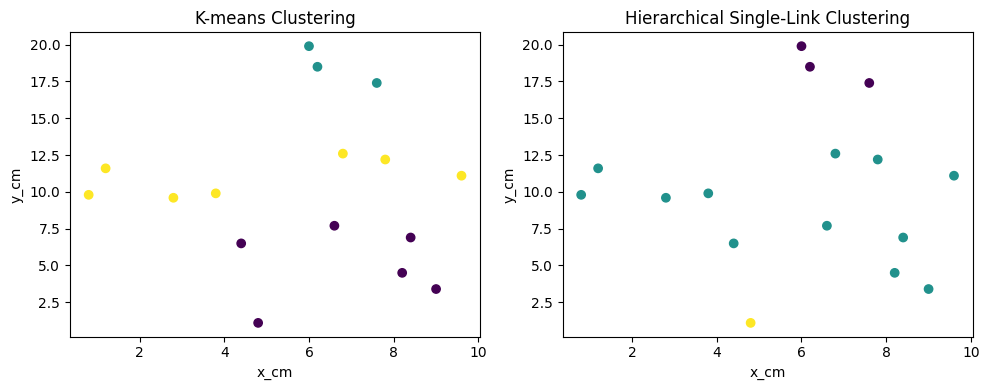

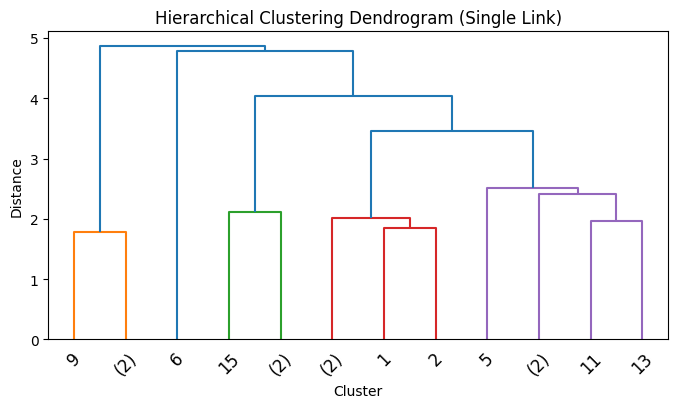

In [3]:
# 9(c) – K-means (K=3) and hierarchical clustering (single link)

K = 3

# K-means
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
df['kmeans_label'] = kmeans.fit_predict(df[['x_cm', 'y_cm']])

# Hierarchical clustering with single linkage
Z = linkage(df[['x_cm', 'y_cm']], method='single')
df['hc_single_label'] = fcluster(Z, t=K, criterion='maxclust')

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].scatter(df['x_cm'], df['y_cm'], c=df['kmeans_label'])
axes[0].set_title('K-means Clustering')
axes[0].set_xlabel('x_cm')
axes[0].set_ylabel('y_cm')

axes[1].scatter(df['x_cm'], df['y_cm'], c=df['hc_single_label'])
axes[1].set_title('Hierarchical Single-Link Clustering')
axes[1].set_xlabel('x_cm')
axes[1].set_ylabel('y_cm')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45.)
plt.title('Hierarchical Clustering Dendrogram (Single Link)')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.show()

### 9(c) Explanation – Comparison

K-means tends to produce **compact, roughly spherical** clusters due to SSE minimization. Single-link hierarchical
clustering can create clusters with arbitrary shapes, and may suffer from the **chaining effect** (one cluster
connecting distant points along a chain of near neighbors).

In this simple 2D example with three Gaussian blobs, both methods should find similar groupings. The dendrogram also
shows where merges occur; a large jump in distance suggests a good place to cut into clusters.

## 9(d) Question – Measuring Clustering Performance
> How do you measure the performance of clustering?

### 9(d) Explanation – Internal Measures

Because clustering is unsupervised, we often use **internal measures**:
- **SSE** (within-cluster sum of squares) used by k-means: lower SSE implies more compact clusters.
- **Silhouette coefficient**, which combines cohesion and separation:
  - For each point, compare average distance to points in its own cluster vs nearest other cluster.
  - Values near 1 indicate well-separated clusters.

If ground-truth labels exist, we can also use **external indices** (e.g., purity, adjusted Rand index), but for
pure clustering tasks the internal measures from the slides (especially SSE and silhouette) are standard.